# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [8]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [9]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(-15.3315)


## Sampling from categorical probabilities with given probabilities

In [10]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(0)


## Animating data

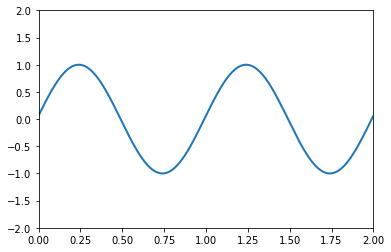

In [25]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

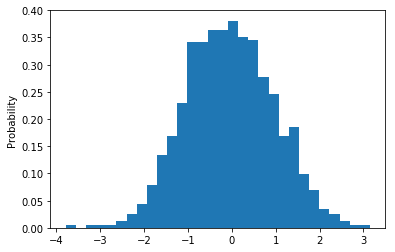

In [12]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

Generate random variable from prefered dystribution using Pyro (pyro.sample)
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram


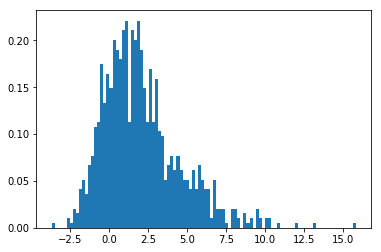

In [102]:
samples = []
iterations = 100
location = 1
scale = 2

for i in range(iterations):
    samples.append(pyro.sample("gumbel_sampling", pyro.distributions.Gumbel(location, scale)))
    
x = np.random.gumbel(location, scale, 1000)
plt.hist(x, density=True, bins=100)
plt.draw()


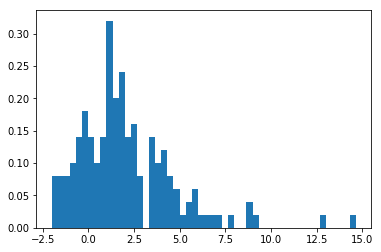

In [106]:
import itertools

def animate():
    values = []
    
    def add_samples(samples_per_frame):
        location = 1
        scale = 2
        for _ in itertools.repeat(None, samples_per_frame):
            values.append(pyro.sample("gumbel_sampling", pyro.distributions.Gumbel(location, scale)))
        
    
    def draw_histogram(_):
        plt.cla()
        add_samples(1)
        plt.hist(values, density=True, bins=50)
    
    anim = animation.FuncAnimation(plt.figure(), draw_histogram, 
                                   init_func=lambda *args: None, #do nothing
                                   repeat=False, frames=150, interval=100)
    return HTML(anim.to_jshtml())

animate()

## Task 2

In [14]:
## Insert solution here